<h2>Pytanie: Czy pandemia koronawirusa SARS-CoV-2 miała wpływ na zmianę wartości kryptowalut?</h2>
    
W wyniku bardzo szybko rozprzestrzeniającego się groźnego wirusa SARS-CoV-2, już od początku 2020 roku ludzie zmuszeni byli do wycofania się z życia społecznego i przeniesienia się do sfery wirtualnej. Internet oraz wszystkie jego instrumenty zyskały większą uwagę społeczeństwa. Pandemia spowodowała gwałtowny rozwój cyfryzacji, dlatego można podejrzewać wzrost zainteresowania kryptowalutami, a zatem także wzrost ich cen.

Do przeprowadzenia analizy będą potrzebne dane dotyczące kilku największych kryptowalut:
1. Bitcoin
2. Ethereum
3. Cardano
4. Dogecoin
5. XRP

Źródło danych: https://www.coindesk.com

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mplfinance as fplt

<h4>Bitcoin (BTC)</h4>

Kategoria: waluta

Propozycja wartości: Wirtualne złoto

Jest to pierwsza na świecie zdecentralizowana kryptowaluta opierająca się o technologię blockchain.

In [2]:
BTC_df = pd.read_csv(f'BTC.csv', sep=',')
BTC_df['Date'] = pd.to_datetime(BTC_df['Date'])
BTC_df.columns = ['Currency', 'Date', 'Close', 'Open', 'High', 'Low']
BTC_df.head()

,Currency,Date,Close,Open,High,Low
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [3]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  2813 non-null   object        
 1   Date      2813 non-null   datetime64[ns]
 2   Close     2813 non-null   float64       
 3   Open      2813 non-null   float64       
 4   High      2813 non-null   float64       
 5   Low       2813 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 132.0+ KB


Pozyskana ramka danych składa się z sześciu kolumn - kolumna z nazwą kryptowaluty, datą oraz cztery kolumny zawierające wartości liczbowe: cenę otwarcia i zamknięcia oraz najwyższą i najniższą wartość kryptowaluty zarejestrowaną danego dnia. Wszystkie ceny są podawane w przeliczeniu na USD.

Tabela zawiera dokładnie 2813 niepustych rekordów dla każdej kolumny, co oznacza że nie ma brakujących informacji.

In [4]:
BTC_annually = []
for i in range(2021-2012):
    x = 2013+i
    BTC_year = BTC_df.loc[(BTC_df.Date.dt.year==x)]
    y = [BTC_year.Close.mean(),BTC_year.Close.std(),BTC_year.Close.min(),BTC_year.Close.max()]
    BTC_annually.append(y)

BTC_annually = pd.DataFrame(BTC_annually, index=[2013,2014,2015,2016,2017,2018,2019,2020,2021],\
                            columns=['Avg', 'Std', 'Min', 'Max'])
BTC_annually

,Avg,Std,Min,Max
2013,489.037464,328.531824,108.584830,1154.925930
2014,527.571837,151.919338,306.459990,970.650830
2015,272.232906,59.112165,193.351100,467.831000
2016,566.223289,137.697842,369.133000,971.645000
2017,3951.843611,3937.222578,772.661250,19166.978740
2018,7634.528216,2385.611805,3200.642468,16735.106250
2019,7363.024208,2654.154075,3360.534076,12575.904067
2020,11064.477459,4194.494640,4944.702336,28768.836208
2021,45946.116654,10044.683082,29111.521567,63346.789035


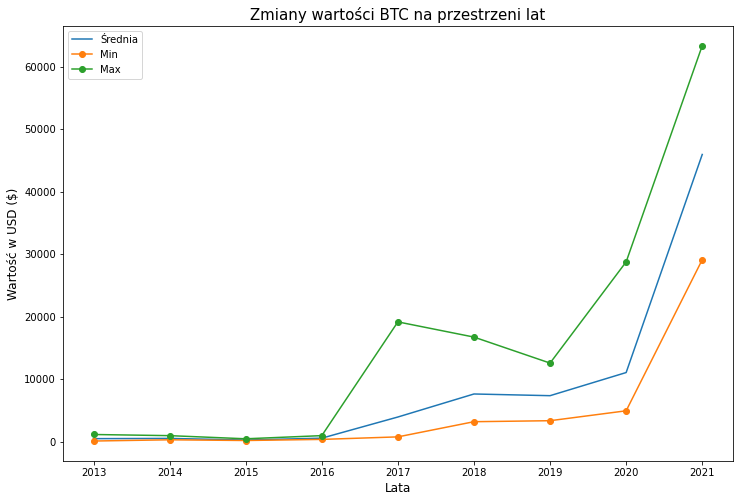

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(BTC_annually.index, BTC_annually.Avg)
plt.plot(BTC_annually.index, BTC_annually.Min, marker='o')
plt.plot(BTC_annually.index, BTC_annually.Max, marker = 'o')
plt.xlabel('Lata', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Zmiany wartości BTC na przestrzeni lat", fontsize=15)
plt.legend(['Średnia', 'Min', 'Max'])
plt.show()

Na uproszczonym wykresie można zauważyć, że w początkowych latach wartość Bitcoina zmieniała się nieznacznie. Patrząc na wartości maksymalne rejestrowane na przestrzeni lat, wyraźny skok można odczytać między 2016 i 2017 rokiem, jednak wysoka wartość nie mogła się długo utrzymywać, ponieważ nie pociągnęła za sobą wartości średniej. Następne lata nadal utrzymują wyraźną tendencję wzrostową, aż do 2020 roku, gdzie znów można odczytać bardzo duży skok wartości BTC. Powyżej przedstawiony wykres jest bardzo uproszczonym modelem agregującym wartości z całego roku, dlatego należy bardzo ostrożnie oceniać informacje w nim zawarte. Dokładniejszą analizę można wykonać na kolejnym wykresie.

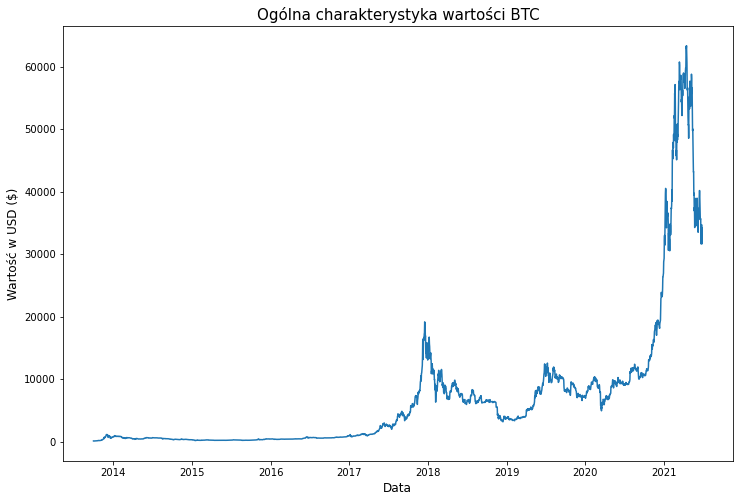

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(BTC_df.Date.values, BTC_df.Close.values)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Ogólna charakterystyka wartości BTC", fontsize=15)
plt.show()

Powyższy wykres przedstawia charakterystykę codziennie rejestrowanej wartości Bitcoina. Na wykresie można zauważyć trzy wyraźne szczyty: 
I na końcu 2013 roku,
II na końcu 2017 roku,
III na przełomie 2020 i 2021 roku.

Z racji skali, pierwszy szczyt jest niewielki, natomiast każdy kolejny znacząco przewyższa poprzedni. Okres między 2014 i 2017 rokiem wydaje się być praktycznie płaski, ponieważ skoki cen były niewielkie w odniesieniu do całości zmian. Najwyższy pułap (blisko 20.000 USD) osiągnięty jeszcze w 2017 roku udało się ponownie osiągnąć i przebić dopiero pod koniec roku 2020. W 2021 roku wartość Bitcoina ponownie poszybowała, osiągając powyżej 60.000 USD i wypłaszczając przy tym cały poprzedzający wykres. Można także zaobserwować, że okresy pomiędzy kolejnymi szczytami skracają się (najpierw prawie 4 lata, następny szczyt już po 3 latach).

<h2>Szczegółowe spojrzenie na każdy szczyt</h2>

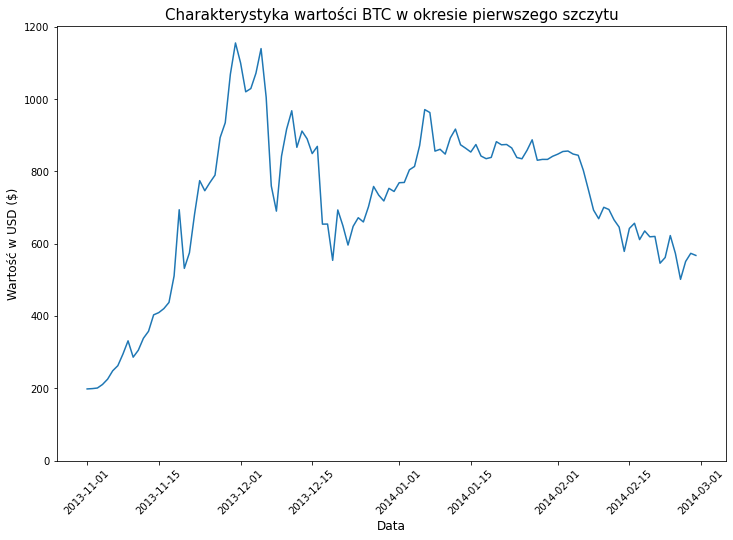

In [7]:
BTC_13_peak = BTC_df.set_index('Date')
BTC_range = pd.date_range(start="2013-11-01", end="2014-02-28")
BTC_13_peak_df = BTC_13_peak[BTC_13_peak.index.isin(BTC_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(BTC_13_peak_df.index.values, BTC_13_peak_df.Close.values)
ax.set_ylim(ymin=0)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Charakterystyka wartości BTC w okresie pierwszego szczytu", fontsize=15)

plt.show()

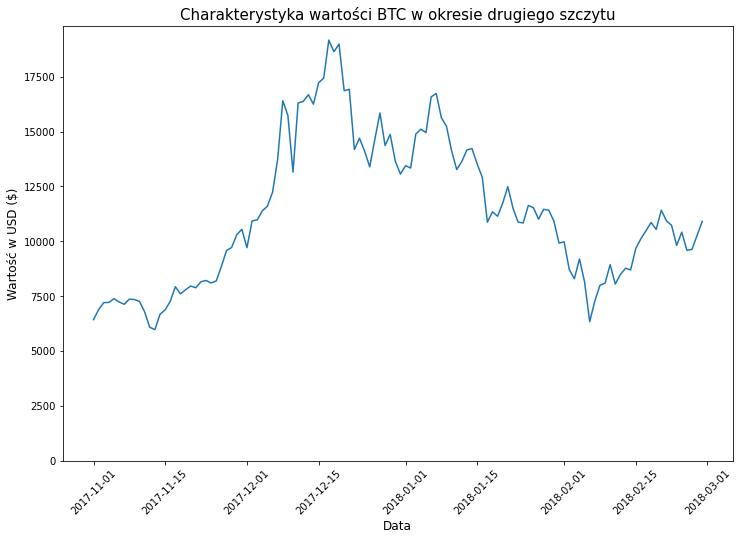

In [8]:
BTC_17_peak = BTC_df.set_index('Date')
BTC_range = pd.date_range(start="2017-11-01", end="2018-02-28")
BTC_17_peak_df = BTC_17_peak[BTC_17_peak.index.isin(BTC_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(BTC_17_peak_df.index.values, BTC_17_peak_df.Close.values)
ax.set_ylim(ymin=0)
plt.xlabel('Data', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Charakterystyka wartości BTC w okresie drugiego szczytu", fontsize=15)
plt.show()

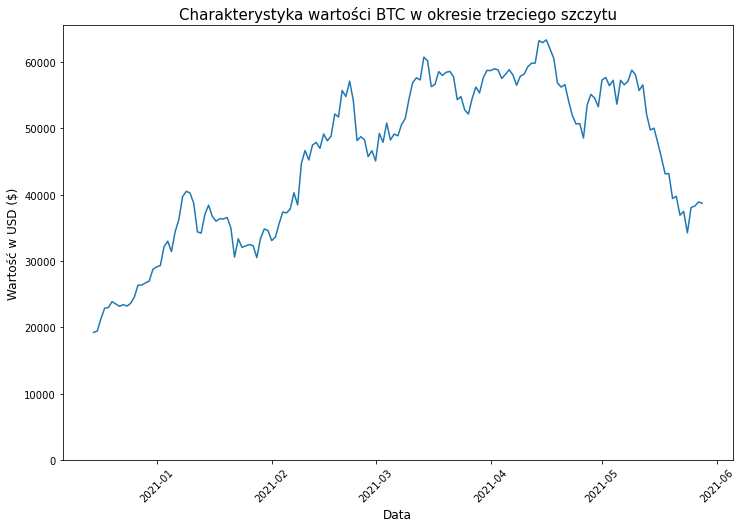

In [9]:
BTC_20_peak = BTC_df.set_index('Date')
BTC_range = pd.date_range(start="2020-12-15", end="2021-05-28")
BTC_20_peak_df = BTC_20_peak[BTC_20_peak.index.isin(BTC_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(BTC_20_peak_df.index.values, BTC_20_peak_df.Close.values)
ax.set_ylim(ymin=0)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.xticks(rotation=45)
plt.title("Charakterystyka wartości BTC w okresie trzeciego szczytu", fontsize=15)
plt.show()

Kształty pierwszego oraz drugiego szczytu są do siebie bardzo podobne. Mają charakterystyczne przyspieszenie wzrostu trwające nie dłużej niż dwa miesiące, chwilowy moment w najwyższym punkcie, a następnie gwałtowny spadek i utrzymanie trendu zniżkowego. Ostatni szczyt kształtował się nieco inaczej. Wartość wyraźnie wahała się przed osiągnięciem najwyższego punktu, a tuż po jego osiągnięciu nadal pozostała na relatywnie wysokim poziomie, aby chwilę później nieco spaść. W przeciwieństwie do poprzednich szczytów, tutaj można wyróżnić 5 regularnych cykli wahań rozłożonych na przestrzeni pięciu miesięcy.

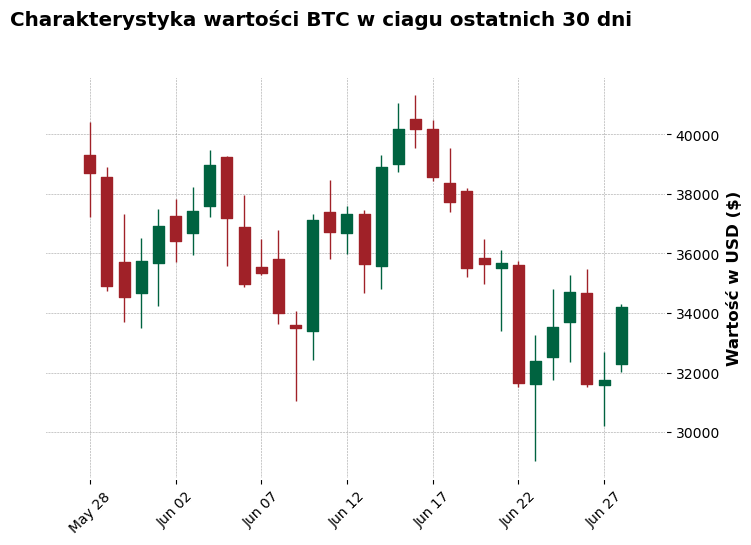

In [10]:
BTC_last_30_days = BTC_df.set_index('Date')
BTC_range = pd.date_range(start="2021-05-28", end="2021-06-28")
BTC_last_30_days_df = BTC_last_30_days[BTC_last_30_days.index.isin(BTC_range)]

fplt.plot(
            BTC_last_30_days_df,
            type='candle',
            style='charles',
            figratio=(12,8),
            title='Charakterystyka wartości BTC w ciagu ostatnich 30 dni',
            ylabel='Wartość w USD ($)'
        )

W ciągu ostatnich 30 dni cena Bitcoina waha się w granicach 30-40 tys. USD utrzymując kierunek raczej spadkowy.

<h2>Prezentacja pozostałych kryptowalut</h2>

<h4>Ethereum (ETH)</h4>

Kategoria: platforma cyfrowa

Propozycja wartości: global computer

Jest to platforma cyfrowa, która umożliwia budowanie wielu zdecentralizowanych aplikacji.

In [11]:
ETH_df = pd.read_csv(f'ETH.csv', sep=',')
ETH_df['Date'] = pd.to_datetime(ETH_df['Date'])
ETH_df.columns = ['Currency', 'Date', 'Close', 'Open', 'High', 'Low']
ETH_df.head()

,Currency,Date,Close,Open,High,Low
0,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
1,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
3,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
4,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151


In [12]:
ETH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  2136 non-null   object        
 1   Date      2136 non-null   datetime64[ns]
 2   Close     2136 non-null   float64       
 3   Open      2136 non-null   float64       
 4   High      2136 non-null   float64       
 5   Low       2136 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 100.2+ KB


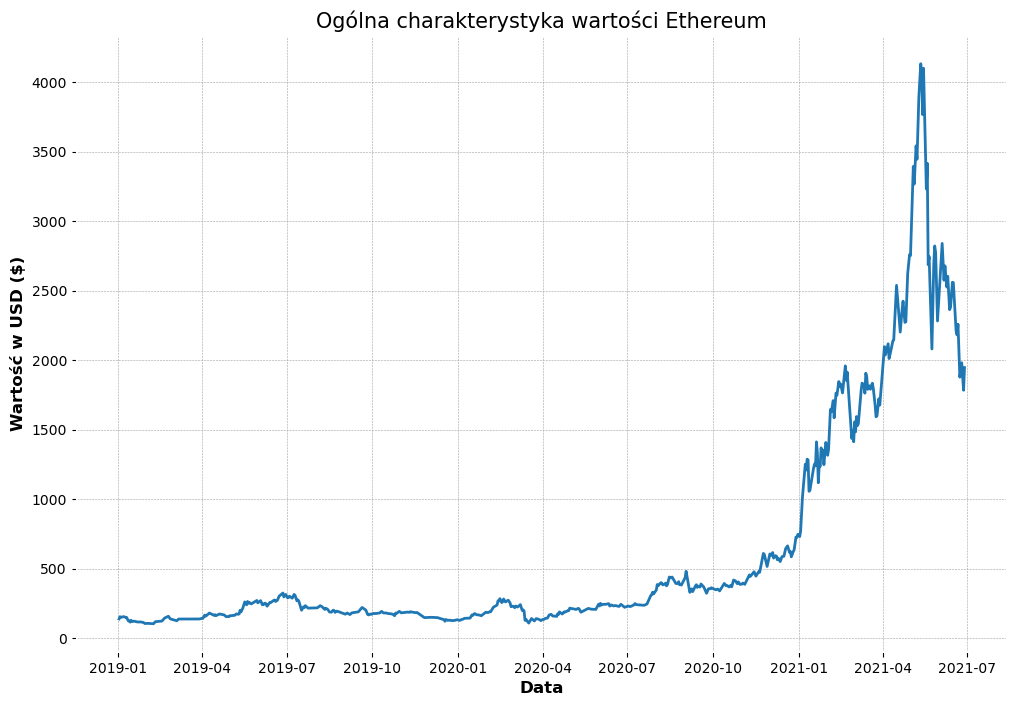

In [13]:
ETH_since_19 = ETH_df.set_index('Date')
ETH_range = pd.date_range(start="2019-01-01", end="2021-06-28")
ETH_since_19_df = ETH_since_19[ETH_since_19.index.isin(ETH_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(ETH_since_19_df.index.values, ETH_since_19_df.Close.values)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Ogólna charakterystyka wartości Ethereum", fontsize=15)
plt.show()

Z powyższego wykresu można odczytać, że Ethereum na przestrzeni ostatnich lat utrzymywało się na poziomie poniżej 500 USD. Widać wyraźnie, że nieśmiało dotyka tej granicy w okolicach trzeciego kwatału 2020 roku, aby w czwartym kwartale jeszcze tego samego roku przebić się i podwoić swoją wartość. Od początku 2021 roku z kilkoma korektami nieprzerwanie wznosi się coraz bardziej agresywnie i osiaga szczyt w okolicach maja. Następnie równie szybko spada do poziomu połow swojej szczytowej wartości.

<h4>Cardano (ADA)</h4>

Kategoria: platforma cyfrowa

Propozycja wartości: global computer

Jest to zdecentralizowana, open-source'owa platforma oparta na publicznym rejestrze blockchain, stworzona dla smart-kontraktów, tokenów dystrybuowanych podczas ICO, zdecentralizowanych aplikacji oraz wymiany wartości za pomocą cyfrowej waluty.

In [14]:
ADA_df = pd.read_csv(f'ADA.csv', sep=',')
ADA_df['Date'] = pd.to_datetime(ADA_df['Date'])
ADA_df.columns = ['Currency', 'Date', 'Close', 'Open', 'High', 'Low']
ADA_df.head()

,Currency,Date,Close,Open,High,Low
0,ADA,2018-06-01,0.218973,0.224155,0.224991,0.216746
1,ADA,2018-06-02,0.219180,0.223207,0.227988,0.213887
2,ADA,2018-06-03,0.227665,0.220317,0.228962,0.216588
3,ADA,2018-06-04,0.226597,0.226565,0.236650,0.222872
4,ADA,2018-06-05,0.213313,0.226409,0.230272,0.209228


In [15]:
ADA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  1110 non-null   object        
 1   Date      1110 non-null   datetime64[ns]
 2   Close     1110 non-null   float64       
 3   Open      1110 non-null   float64       
 4   High      1110 non-null   float64       
 5   Low       1110 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 52.2+ KB


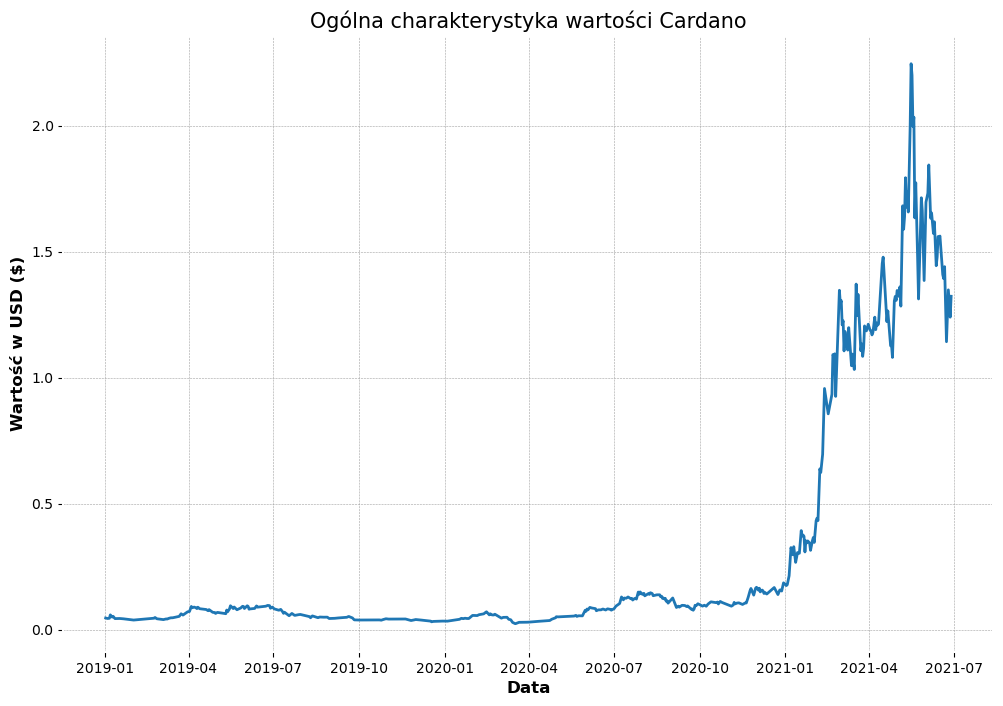

In [16]:
ADA_since_19 = ADA_df.set_index('Date')
ADA_range = pd.date_range(start="2019-01-01", end="2021-06-28")
ADA_since_19_df = ADA_since_19[ADA_since_19.index.isin(ADA_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(ADA_since_19_df.index.values, ADA_since_19_df.Close.values)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Ogólna charakterystyka wartości Cardano", fontsize=15)
plt.show()

Kryptowaluta Cardano od początku 2019 roku aż do początku 2021 utrzymywała raczej stałą wartość nieco powyżej zera. Od początku tego roku widać wyraźny dwustopniowy wzrost wartości aż do poziomu powyżej 2 USD. Po osiągnięciu szczytu wartość Cardano opada do poziomu mniej więcej połowy szczytowej wartości.

<h4>Dogecoin (DOGE)</h4>

Kategoria: waluta

Propozycja wartości: memecoin

Jest to system płatności stworzony ramach żartu, naśmiewającego się ze spekulacji kryptowalutami.

In [17]:
DOGE_df = pd.read_csv(f'DOGE.csv', sep=',')
DOGE_df['Date'] = pd.to_datetime(DOGE_df['Date'])
DOGE_df.columns = ['Currency', 'Date', 'Close', 'Open', 'High', 'Low']
DOGE_df.head()

,Currency,Date,Close,Open,High,Low
0,DOGE,2019-02-28,0.001944,0.001962,0.001963,0.001908
1,DOGE,2019-03-01,0.001912,0.001944,0.001955,0.001896
2,DOGE,2019-03-02,0.001956,0.001912,0.001977,0.001911
3,DOGE,2019-03-03,0.001970,0.001957,0.001980,0.001940
4,DOGE,2019-03-04,0.001948,0.001970,0.001989,0.001940


In [18]:
DOGE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  852 non-null    object        
 1   Date      852 non-null    datetime64[ns]
 2   Close     852 non-null    float64       
 3   Open      852 non-null    float64       
 4   High      852 non-null    float64       
 5   Low       852 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 40.1+ KB


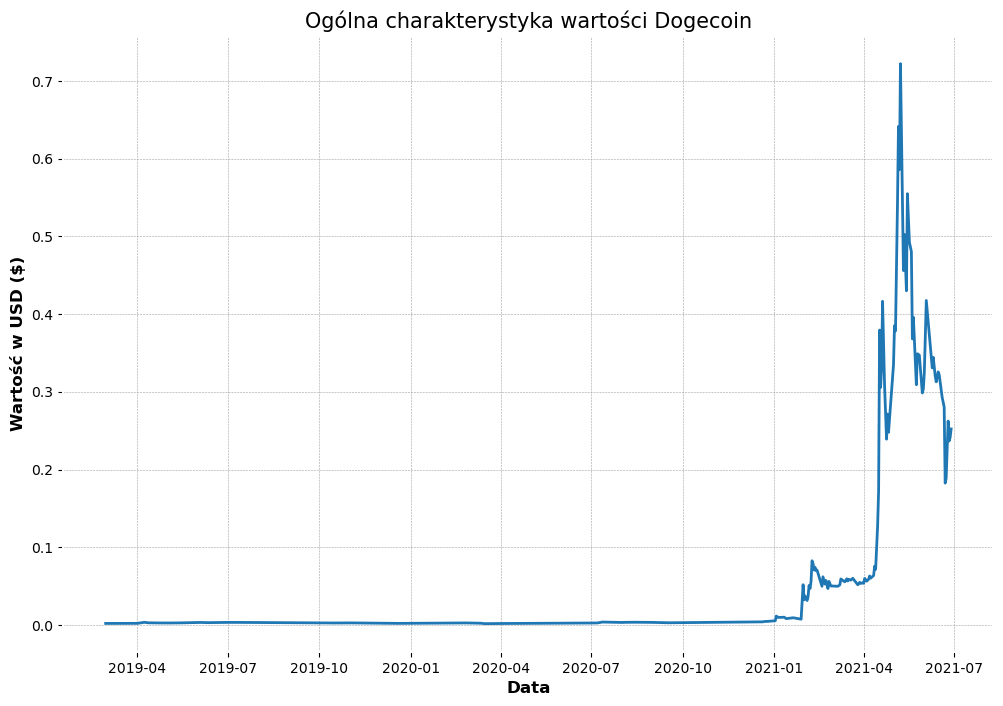

In [19]:
DOGE_since_19 = DOGE_df.set_index('Date')
DOGE_range = pd.date_range(start="2019-01-01", end="2021-06-28")
DOGE_since_19_df = DOGE_since_19[DOGE_since_19.index.isin(DOGE_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(DOGE_since_19_df.index.values, DOGE_since_19_df.Close.values)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Ogólna charakterystyka wartości Dogecoin", fontsize=15)
plt.show()

Z wykresu można odczytać, że Dogecoin od samego początku istnienia aż do 2021 roku utrzymywał się na poziomie bliskim 0. Tutaj także można zauważyć zmianę trendu i bardzo wyraźny skok aż do wartości 0,70 USD w szczytowym momencie w okolicach maja bieżącego roku. Szczytowa wartość nie utrzymywała się długo, zaraz potem nastąpił spadek poniżej połowy szczytowej wartości.

<h4>XRP</h4>

Kategoria: waluta

Propozycja wartości: system płatności

Jest to system rozliczeń w czasie rzeczywistym oraz sieć wymiany walut i przekazów pieniężnych stworzona przez firmę Ripple.

In [20]:
XRP_df = pd.read_csv(f'XRP.csv', sep=',')
XRP_df['Date'] = pd.to_datetime(XRP_df['Date'])
XRP_df.columns = ['Currency', 'Date', 'Close', 'Open', 'High', 'Low']
XRP_df.head()

,Currency,Date,Close,Open,High,Low
0,XRP,2018-06-01,0.609705,0.616405,0.618404,0.607282
1,XRP,2018-06-02,0.617604,0.614872,0.621169,0.608681
2,XRP,2018-06-03,0.643043,0.624189,0.650921,0.618503
3,XRP,2018-06-04,0.667634,0.644291,0.677069,0.640769
4,XRP,2018-06-05,0.669680,0.690562,0.706326,0.643054


In [21]:
XRP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  1110 non-null   object        
 1   Date      1110 non-null   datetime64[ns]
 2   Close     1110 non-null   float64       
 3   Open      1110 non-null   float64       
 4   High      1110 non-null   float64       
 5   Low       1110 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 52.2+ KB


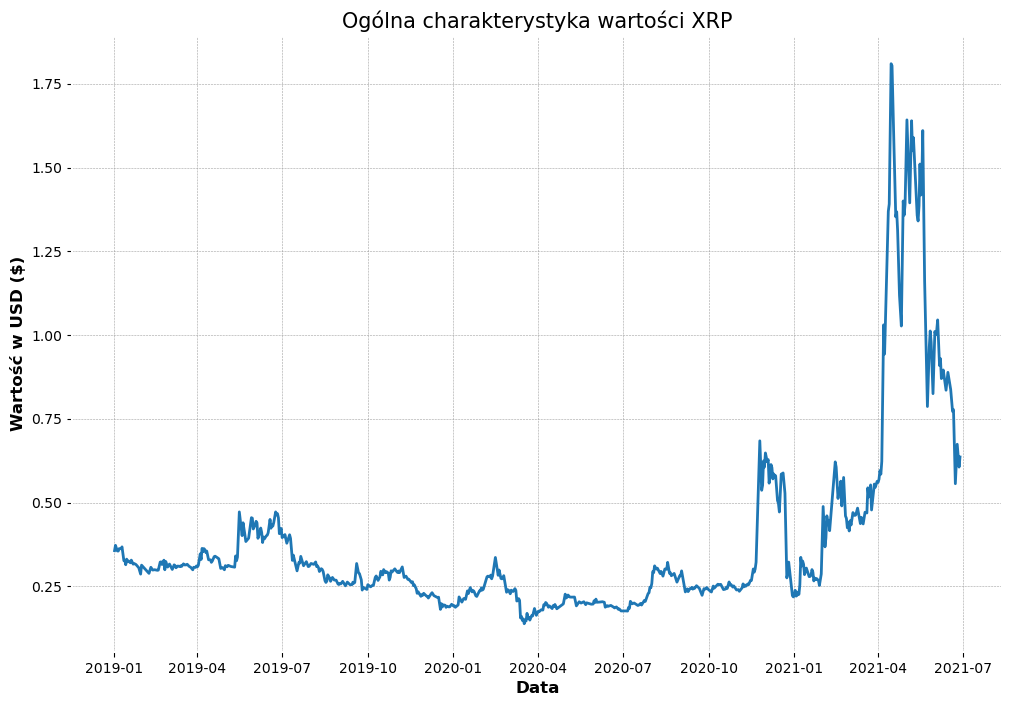

In [22]:
XRP_since_19 = XRP_df.set_index('Date')
XRP_range = pd.date_range(start="2019-01-01", end="2021-06-28")
XRP_since_19_df = XRP_since_19[XRP_since_19.index.isin(XRP_range)]

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(XRP_since_19_df.index.values, XRP_since_19_df.Close.values)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość w USD ($)', fontsize=12)
plt.title("Ogólna charakterystyka wartości XRP", fontsize=15)
plt.show()

Na wykresie XRP widać, że waluta jest dosyć niestabilna. Jej wartość w okresie od początku 2019 do trzeciego kwartału 2020 waha się w granicach 0,20 - 0,50 USD. Już przed początkiem 2021 roku śmiało wystartowała osiągając prawie pułap 0,75 USD, aby ponownie na krótko spaść do wcześniej utrzymywanego poziomu 0,25 USD. Po niedługim okresie XRP ponownie zyskuje wzrostowy trend, który utrzymuje się aż do pułapu powyżej 1,75 USD w okolicach kwietnia bieżącego roku. Tak samo jak pozostałe waluty, nie utrzymuje szczytowej wartości, gwałtownie opada do połowy tejże wartości, ale nie zatrzymuje się na tym poziomie, w kolejnym miesiącu zalicza kolejny spadek, zbliżając się ponownie do granicy 0,50 USD.

Porównując powyżej przedstawione wykresy, w każdym przypadku można zaobserwować wyraźny wzrost w pierwszej połowie 2021 roku. Doszukując się wpływu pandemii (której wybuch datowany jest na początek roku 2020) na zmianę wartości kryptowalut, można w każdym przypadku zauważyć o rok opóźnioną reakcję. Związek nie wydaje się być silnym ze względu na tak duże opóźnienie. Kryptowaluty uzależnione są od wielu czynników, które z różną siłą oddziałowują na zmianę wartości. Trzeba jednak stwierdzić, że pandemia nie należy do tych czynników.